# Explainer Notebook – Netflix Actor Network & Text Analysis

---














## 1. Motivation

### What is your dataset?
The dataset used is `netflix_titles.csv`, containing metadata on Netflix movies and TV shows, including title, cast, genre, country, and description.

### Why did you choose this dataset?
We selected the Netflix Titles dataset from Kaggle because it provides a rich and diverse set of metadata on movies and TV shows available on Netflix, including details about cast members, genres, countries of origin, and textual descriptions. This structure makes it particularly well-suited for both network analysis and text analysis.

Our primary motivation was to explore patterns of actor collaboration. We were curious to investigate whether certain actors tend to co-star frequently, whether collaboration patterns are influenced by genres or countries, and whether some actors function as bridges between different genre communities. Additionally, we wanted to examine if some actors are more specialized—appearing predominantly in a narrow range of genres—while others have diverse cross-genre roles.

The dataset provides a valuable opportunity to apply network science techniques—such as analyzing actor connectivity and identifying collaboration communities—to real-world entertainment data. At the same time, it allows us to use natural language processing to explore patterns in how different genres are described across the Netflix catalog.

### What was your goal for the end user's experience?
To create an interactive and engaging website where users can:
- Explore actor collaboration networks.
- See genre-based word clouds from show/movie descriptions.
- Understand patterns in Netflix content in an intuitive way.

---

## 2. Basic Stats & Preprocessing

### Data Cleaning
To guarantee consistency and usefulness, especially for the network and text-based visualizations, a number of preparation processes were required before the dataset could be analyzed:

Managing Missing Values: We eliminated entries that had missing values in important fields like listed_in, cast, or country. Incomplete records would add noise or decrease accuracy, and these fields are crucial for building collaborative networks and genre-specific analysis.

Parsing Multi-Value Fields: The dataset has several values saved as comma-separated strings in a number of columns, including cast, listed_in, and country. These were split into Python lists to allow proper relational mapping between individual entities.


Data Normalization via Exploding:
After parsing, the lists were "exploded" so that each actor-country or actor-genre pair would occupy its own row. This step enables grouping and aggregating data at the individual actor level and is crucial for coloring nodes in the collaboration network by country or genre.

Label Cleaning: 
To prevent redundant categories (such as "Drama" vs. " Drama"), genre labels were stripped of leading or trailing whitespace. This ensured consistency when grouping and visualizing the data.network by country or genre.

We also chose to leave out the director column in our analysis. While it is part of the dataset, it doesn’t fit well into the network model we were building. Directors don’t co-appear like actors do, and the data on them is often sparse or inconsistent. As a result, we focused our network analysis purely on actor collaborations.

These preparation procedures assisted in converting the unstructured Netflix metadata into a format that could be used for text analysis and network graph creation.

### Basic Statistics


The dataset contains 8,807 rows and 12 columns, each representing metadata for a movie or TV show available on Netflix.
To ensure meaningful actor-based visualizations, we dropped rows where the cast field was missing, since this information is essential for building the collaboration network.
After this filtering step, the dataset was reduced to 7,982 entries.

While the dataset includes a range of variables, the most relevant columns for our analysis are:

- **title**: The name of the show or movie.  
- **cast**: A comma-separated list of actors.  
- **listed_in**: One or more genres associated with the title.  
- **description**: A brief textual summary of the content.  
- **type**: Whether the title is a movie or TV show.  
- **release_year**: The year the title was released.


These columns form the basis for both the actor collaboration network (via cast, listed_in, type, and release_year) and the text analysis (via description and listed_in).

Further statistical breakdowns and visualizations—such as the most frequent genres, most common countries of production, and most prolific actors—are included in later sections of the notebook.

Let me know if you want to follow this up with plots or tables to support it!

- Total titles: 7,982
- Unique actors: 36,439
- Most frequent genres: International movies
- Most represented countrie: United States

Here are the graphs for top 10 most common Genres and top 10 most common Countries 

---

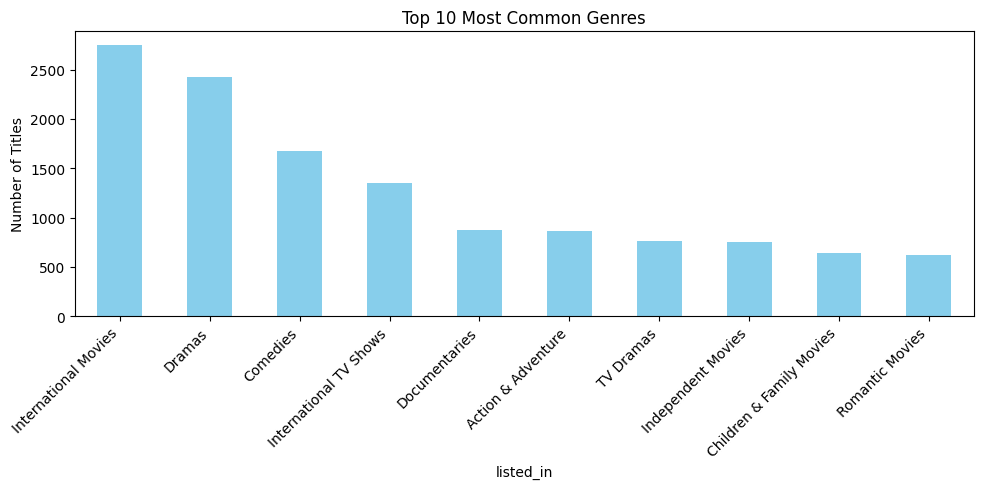

In [ ]:
# Top 10 Most Common Genres
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("netflix_titles.csv")
genre_series = df["listed_in"].dropna().str.split(", ").explode()
top_genres = genre_series.value_counts().head(10)

plt.figure(figsize=(10, 5))
top_genres.plot(kind="bar", color="skyblue")
plt.title("Top 10 Most Common Genres")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


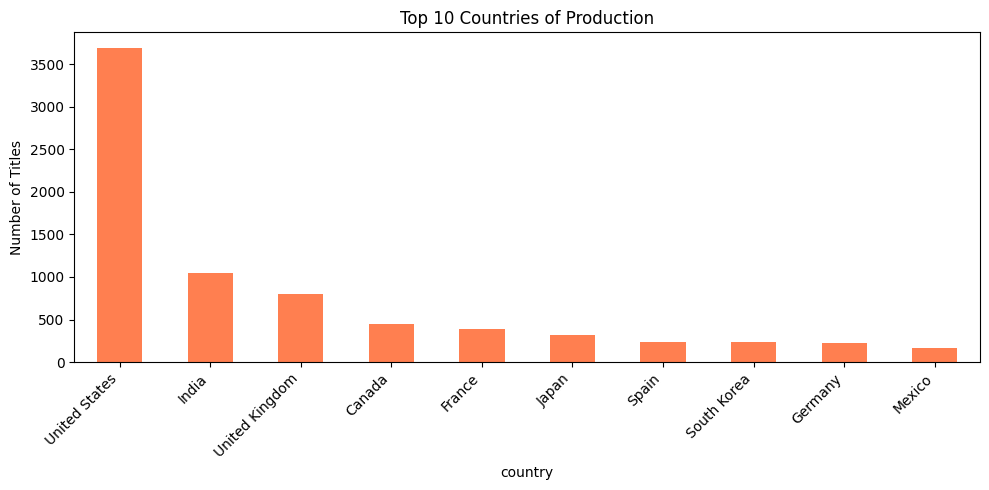

In [8]:
# Top 10 Most Common Countries
country_series = df["country"].dropna().str.split(", ").explode()
top_countries = country_series.value_counts().head(10)

plt.figure(figsize=(10, 5))
top_countries.plot(kind="bar", color="coral")
plt.title("Top 10 Countries of Production")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## 3. Tools, Theory, & Analysis

### Text Analysis
We wanted to explore how different genres are described on Netflix, so we looked at the description field for all titles. Our idea was that the words used in descriptions might reflect patterns or themes that are specific to each genre.

For each genre, we gathered all the descriptions that included it (titles can belong to more than one genre), and combined them into one large block of text. Then we created word clouds to highlight the most common words for that genre.

We eliminated generic adjectives like film, movie, series, new, and so on in order to give the results greater meaning. This would allow the visualizations to draw attention to the words that truly convey the content. For instance, a thriller might highlight phrases like murder or inquiry, whereas a comedy might highlight words like friends, love, or family.

The graphics were created using the WordCloud Python package, and they were displayed on the website using matplotlib.

### Network Analysis
One of the main parts of our project was building a collaboration network based on the actors listed in each title. We wanted to see how actors are connected, who works together the most, and whether there are patterns based on genres or countries.

To do this, we used the cast column, which lists the main actors for each title. Whenever a title had more than one actor, we created links (edges) between each pair of actors who appeared together. If two actors showed up in multiple titles, that connection became stronger (we increased the edge weight).

We focused on the top 450 actors with the most connections (highest degree) to simplify the graph and keep it readable.
This limit was also necessary due to performance and layout constraints on the website — rendering very large networks interactively can quickly become slow or cluttered in the browser.
By keeping the network to a manageable size, we could ensure that the visualization remained responsive and visually clear, while still showing meaningful collaboration patterns.

We made two versions of the graph:

One where nodes (actors) are colored based on the country most often associated with their work.

Another where nodes are colored based on their most common genre.

We used the networkx library to create the graph and plotly to make it interactive, so users can explore the network right in the browser.

For the layout, we used a force-directed algorithm (spring layout), which spaces the nodes out so that strongly connected actors appear closer together. This makes the clusters more visually intuitive.

We also briefly experimented with community detection on a different co-author dataset, using label propagation, but that part is more of a side note and not central to the Netflix analysis.

---

## 4. Discussion

### What went well?
The convenience with which this dataset accommodates itself to both network and text analysis was one of the things that truly worked. The actor cooperation network proved to be an excellent tool for visualizing the ties between actors, and it was further enlightening to color the nodes according to genre or country. Finding closely related groups and even actors who appear to "bridge" various network segments was made simple by the visualizations.

Additionally, the word clouds proved to be an entertaining and useful tool for gaining an understanding of language peculiar to a given genre. It was intriguing to observe how varied some genres may be from one another and how they frequently leaned into specific themes or keywords.

We were also happy with the final result on the website side. Using plotly made the graphs interactive and engaging, which feels more useful and enjoyable than static figures. It’s something you could easily imagine a curious user spending time exploring.

### What could be improved?

That said, there were definitely some limitations. First of all, actor names aren’t unique identifiers, which means we might run into issues where two people with the same name get merged into one node. A more robust dataset (e.g., IMDb with actor IDs) would fix that.

Additionally, there were several discrepancies in the dataset's labeling of countries and genres. Some shows, for instance, list several nations or genres with slightly different formatting. Although we performed some simple cleaning, more sophisticated normalization could increase accuracy, particularly if we intended to perform more in-depth statistical analysis.

Time is another topic we didn't really examine. All collaborations are being given the same treatment, but we could have examined how the network evolves over time or whether certain individuals gain popularity over time.


Lastly, even though the word clouds make a decent initial impression, they are quite superficial; we could go beyond surface-level patterns with appropriate natural language processing, such as topic modeling or sentiment analysis.

---



## Links & Extras

- **Dataset Source (Kaggle)**:  
  [Netflix Movies and TV Shows Dataset by Shivam Bansal](https://www.kaggle.com/datasets/shivamb/netflix-shows)  
  *(This is the original dataset we used for our analysis.)*

- **Dataset Download (CSV)**:  
  [Download netflix_titles.csv](assets/netflix_titles.csv)  
  *(Users can download the cleaned dataset here if they want to explore it themselves.)*


- **Explainer Notebook (nbviewer link)**:  
  [View the full analysis on nbviewer](https://nbviewer.org/github/frodokramer00/compsci2/blob/main/Explainer%20notebook.ipynb)  
  

- **Live Website**:  
  [Visit the interactive visualization site](https://website-for-social-info.onrender.com/)  
  